### Introductıon

All of our bodies are composed of cells. The human body has about 100 trillion cells within it. And usually those cells behave in a certain way. However, occasionally, one of these 100 trillion cells, behave in a different way and keeps dividing and pushes the other cells around it out of the way. That cell stops observing the rules of the tissue within which it is located and begins to move out of its normal position and starts invading into the tissues around it and sometimes entering the bloodstream and becoming is called a metastasis.

In summary, as we grow older,throughout a lifetime, we go through this kind of situation where a particular kind of gene is mutated where the protein that it makes is abnormal and drives the cell to behave in a different way that we call cancer.

This is what Dr. WIlliam H. Wolberg was observing and put together this dataset.

## Can we predict whether a cell is Malignant or Benign?

In this project. We will try to predict the cell whether is Malignant(cancer cell) or Benign(healthy). So We can ensure and take an action beforehand.

### Data Description

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

Malignant==> Cancerous

Benign==> Not Cancerous (Healthy)



### Import Librariers

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('breastCancer.csv')

In [4]:
data.head() ## Let's discover the dataset

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Data Preprocessing

In [5]:
data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [6]:
data.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [7]:
data.shape

(699, 11)

In [8]:
# We see that data type of the bare_nucleoli is supposed to be int64 .
# So We need to change the data type from object to integer

In [9]:
data[data['bare_nucleoli']=='?']['bare_nucleoli'].count()

16

In [10]:
data[data['bare_nucleoli']=='?'].sum()

id                           13721250
clump_thickness                    54
size_uniformity                    39
shape_uniformity                   46
marginal_adhesion                  29
epithelial_size                    39
bare_nucleoli        ????????????????
bland_chromatin                    50
normal_nucleoli                    44
mitoses                            16
class                              36
dtype: object

In [11]:
df = data.replace('?',np.nan)  ## We replaced the question mark with NaN which is null value

In [12]:
df = df.fillna(df.median())   ## We just replaced all the null values with their median

In [13]:
df.isnull().sum()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

In [14]:
### Now We need to change datatype of 'bare_nucleoli' with integer

In [15]:
df['bare_nucleoli'] = df['bare_nucleoli'].astype('int64')     ## Change the datatype 

## Exploratory Data Analysis

In [16]:
df.head()  # Let's see the first 5 rows with futures by using head method

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [17]:
## Since id feature  is not giving any info about the dataset . We can basicly drop the columns with drop method.
df.drop("id",axis=1,inplace=True)

In [18]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [19]:
df.describe().T # Let's see basic statistics of our numeric features

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


## Bivariate Analysis

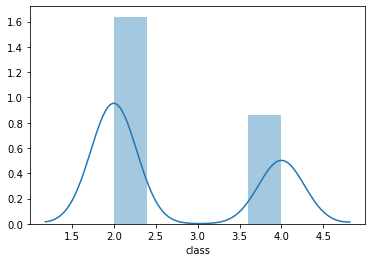

In [20]:
sns.distplot(df["class"])

## Multivariate Data Analysis

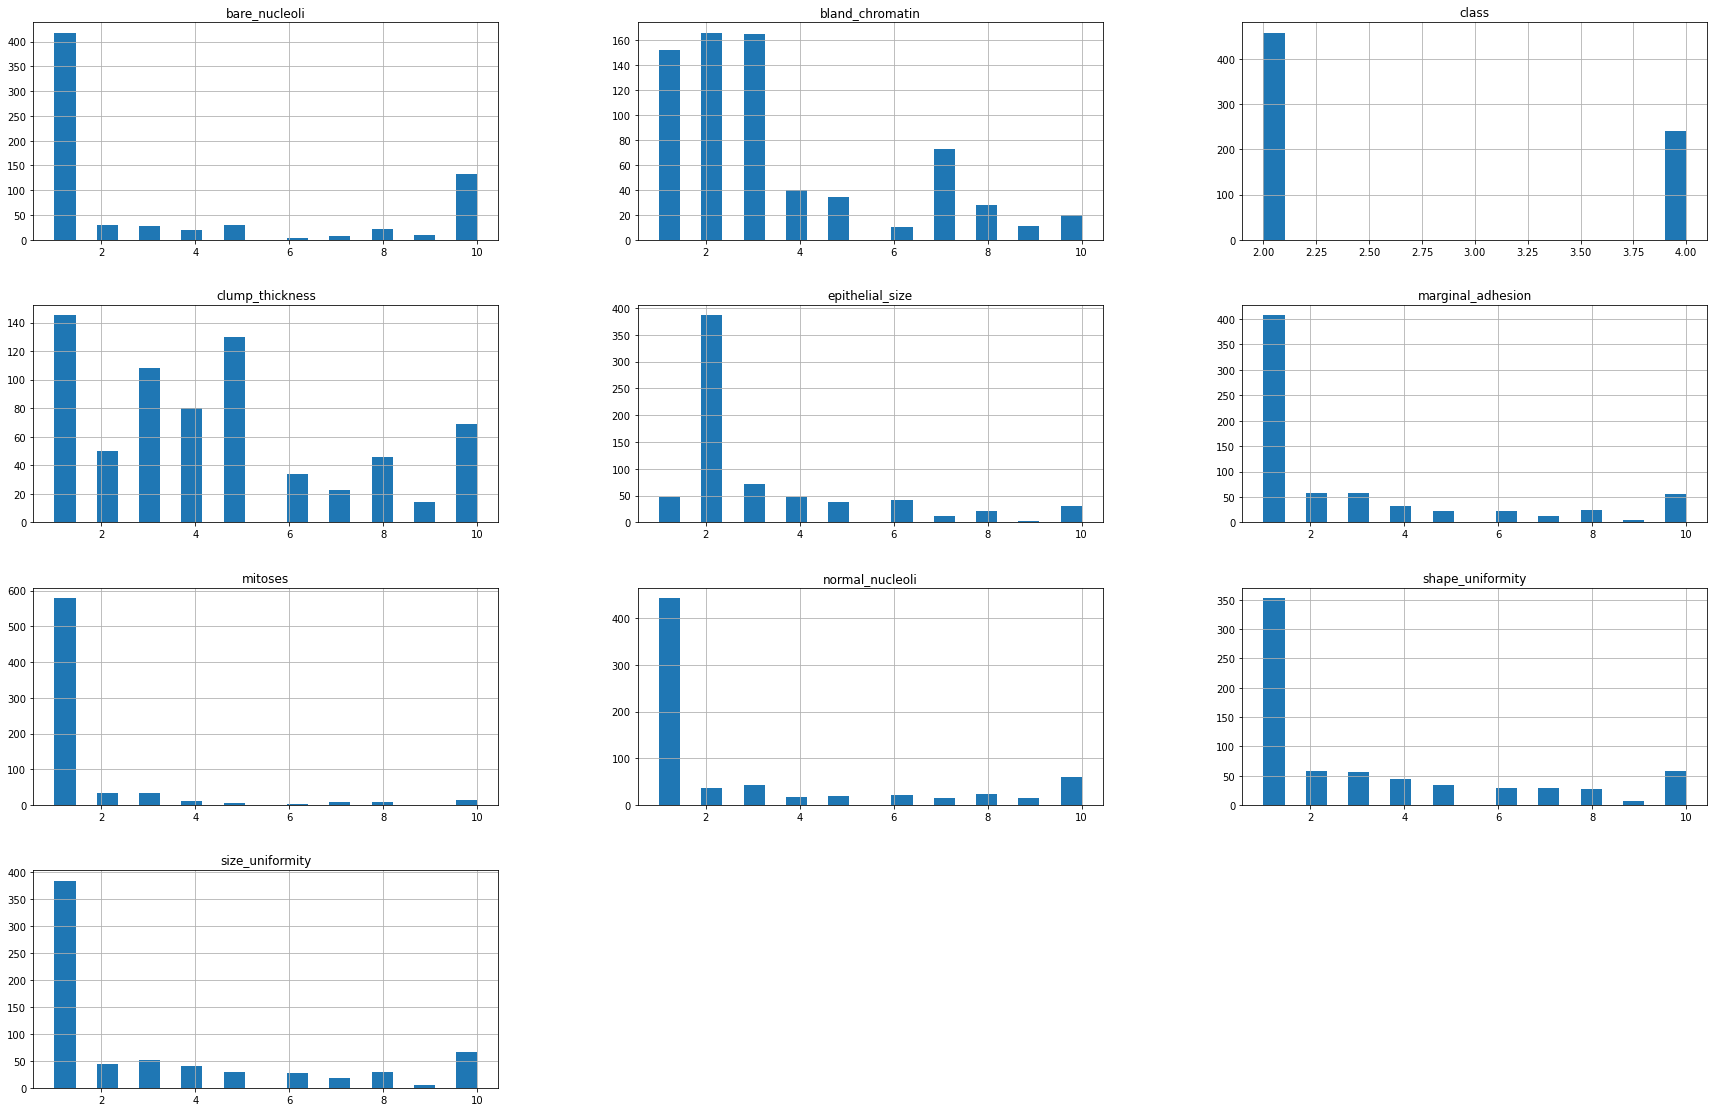

In [21]:
df.hist(bins=20,figsize=(30,30),layout=(6,3));

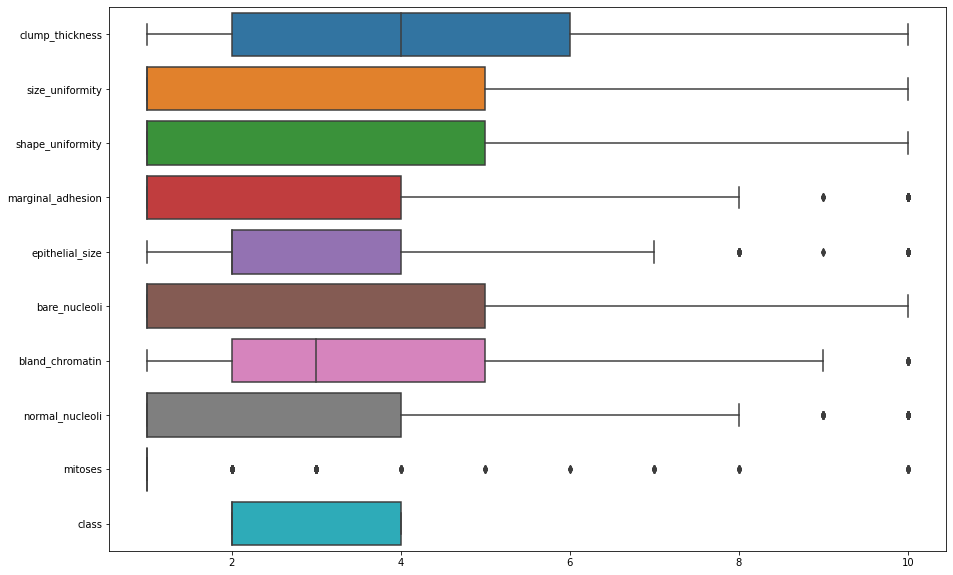

In [22]:
plt.figure(figsize = (15,10))
sns.boxplot(data=df,orient="h")

In [23]:
df.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


In [24]:
cor = df.corr()  #We assigned a string value.

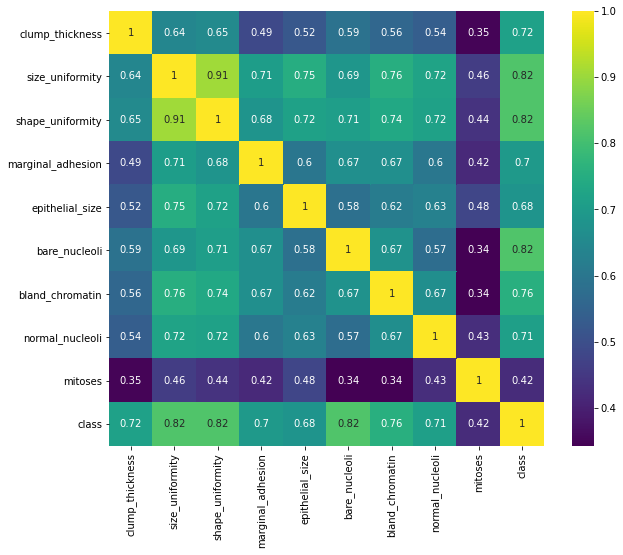

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot = True,square = True,cmap="viridis",vmax=1)
plt.show()

C:\Users\muhammet.ugur\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


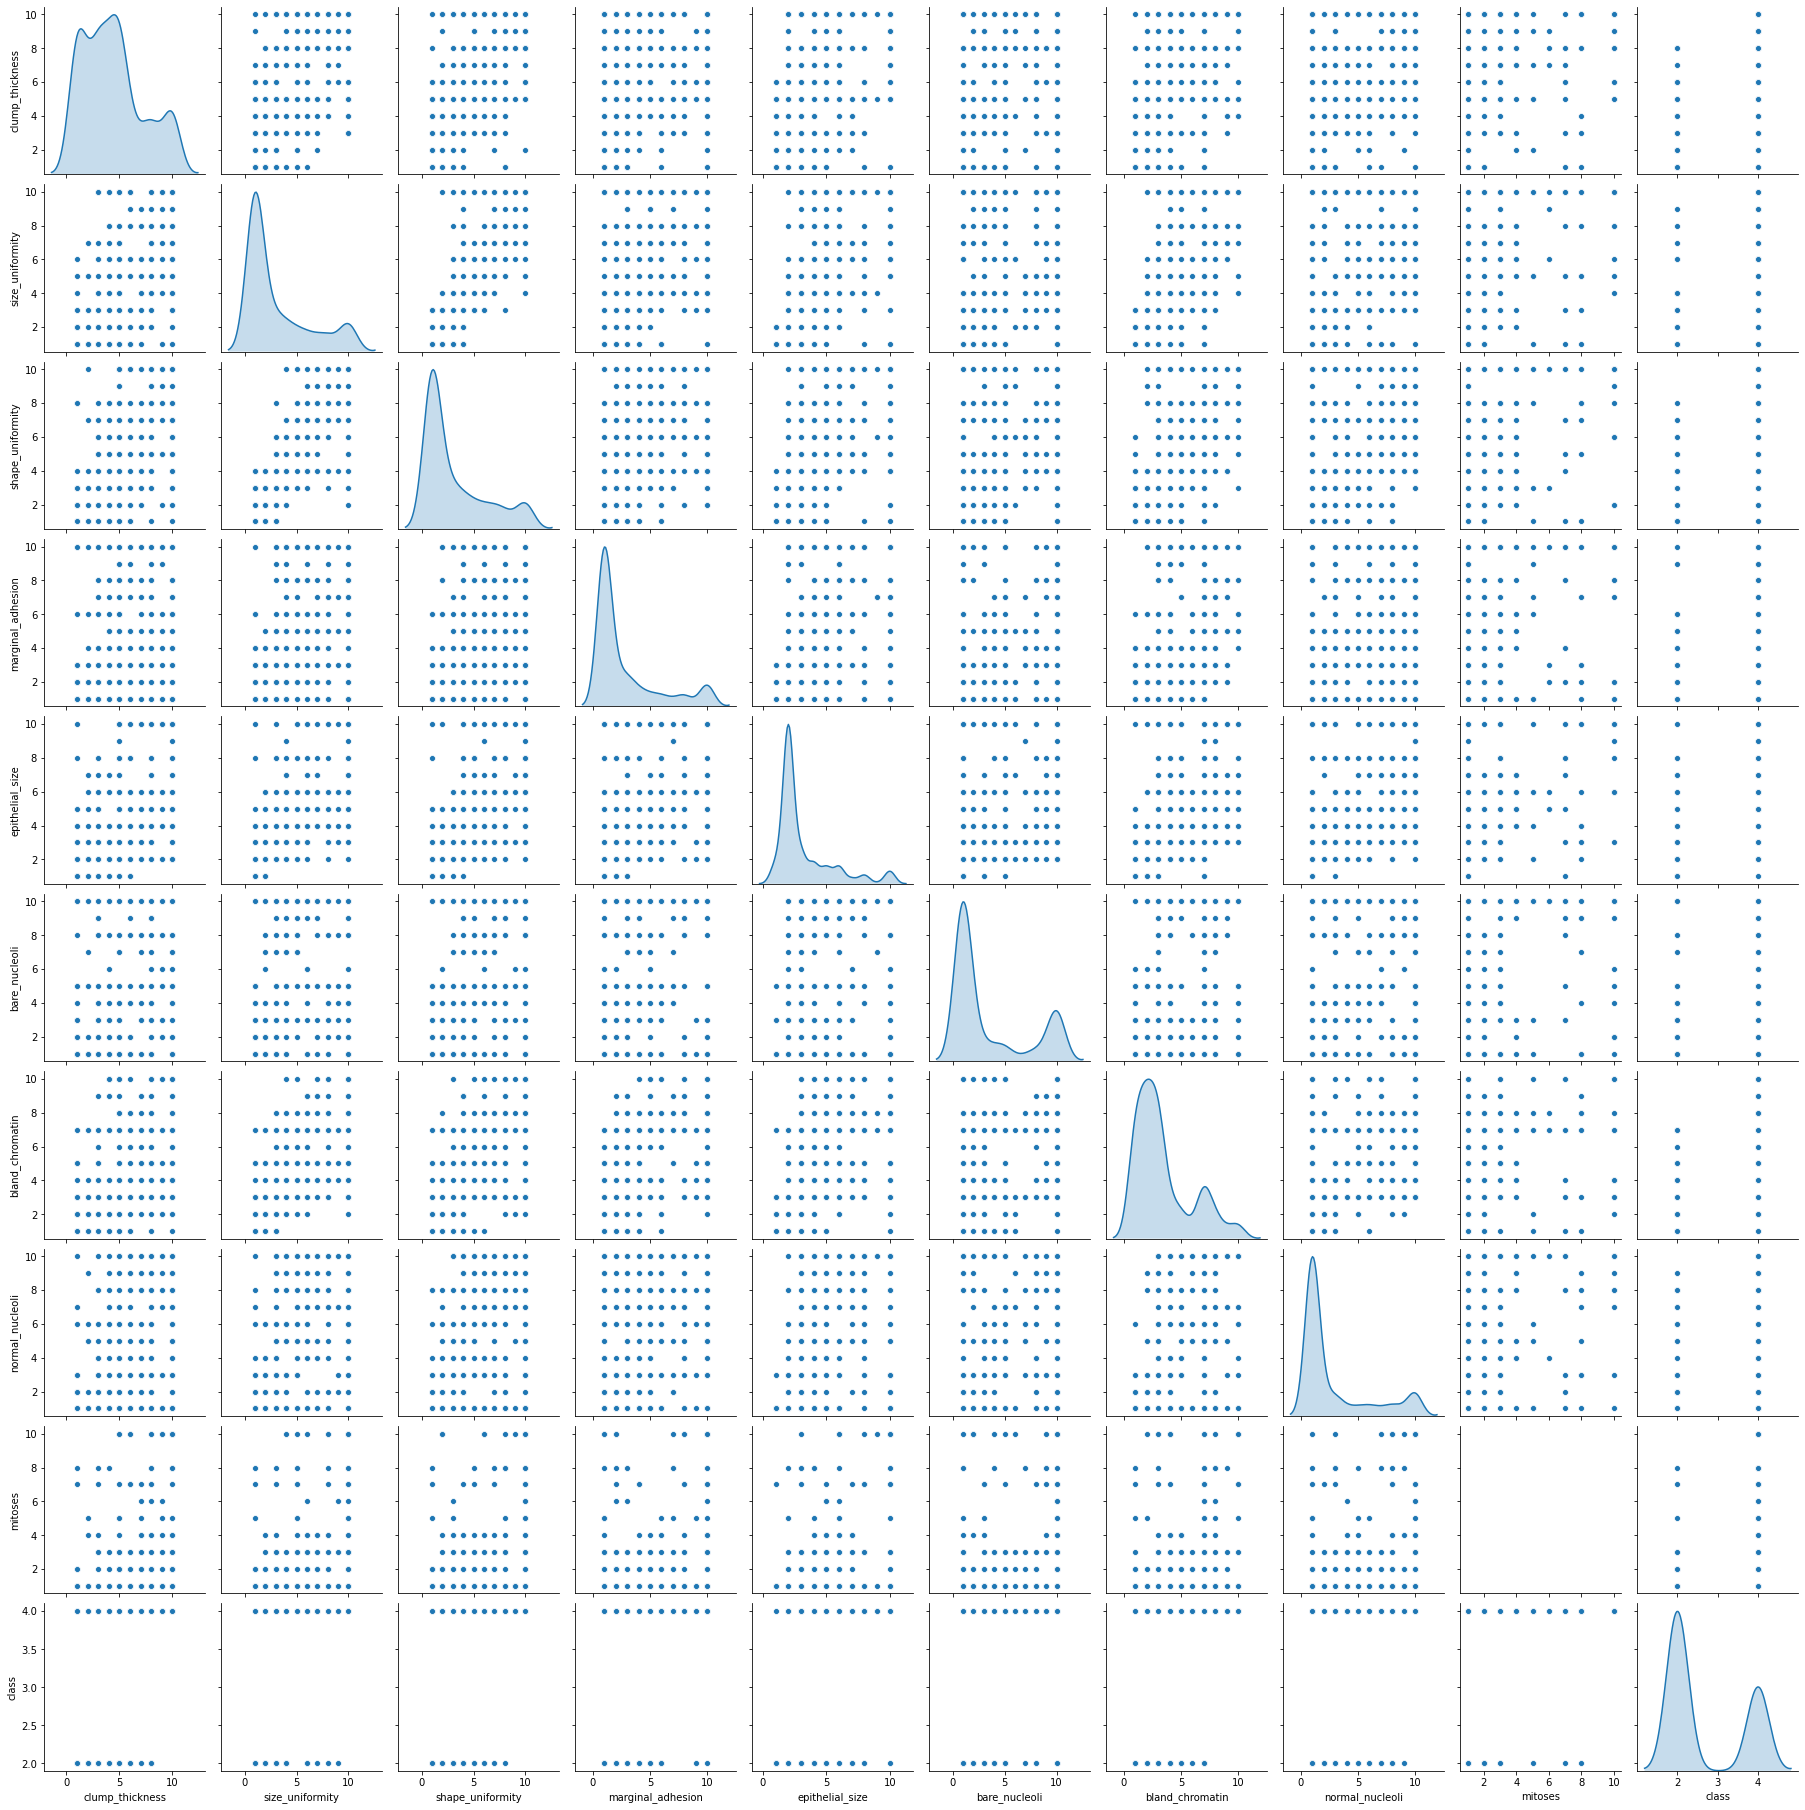

In [26]:
sns.pairplot(df,diag_kind="kde")

## Building Our Model

#### We need to seperate our dataset as two parts. Train and Test 

In [28]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [29]:
X = df.drop("class",axis=1)  ## Features 
y = df["class"]              # Target

In [30]:
## After We separated our feature and target columns. We need to call train_test_split function from sckit.learn

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1) 
## We used train_test_split function to split our data into train and test 

## KNeighborsClassifier

In [33]:
# İmport KNN Classifier from sklearn

In [34]:
from sklearn.neighbors import KNeighborsClassifier 

In [35]:
KNN= KNeighborsClassifier(n_neighbors=5,weights="distance")

In [36]:
KNN.fit(X_train,y_train)  ## Our model learned the data 

KNeighborsClassifier(weights='distance')

In [37]:
predicted_1=KNN.predict(X_test)  ## Learned(fitted) model is going to predict our dataset!

In [38]:
predicted_1

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2], dtype=int64)

In [39]:
from scipy.stats import zscore                       ## z score for model
print("KNeighborsClassifier Algorithm is predicting at {0:.2g}%:".format(KNN.score(X_test,y_test)*100)) 

KNeighborsClassifier Algorithm is predicting at 97%:


## Support Vector Machine

In [40]:
from sklearn.svm import SVC  # import SVC

In [41]:
svc=SVC(gamma=0.025,C=3)    # We did the assignment for hyperparameters and SVC
svc.fit(X_train,y_train)

SVC(C=3, gamma=0.025)

In [42]:
predicted_2 = svc.predict(X_test)
predicted_2

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2], dtype=int64)

In [43]:
from scipy.stats import zscore
print("Support Vector Machine Algorithm is predicting at {0:.2g}%:".format(svc.score(X_test,y_test)*100)) 

Support Vector Machine Algorithm is predicting at 98%:


In [44]:
knnPredictions = pd.DataFrame(predicted_1)  ## to compare these two algorithm side by side. We turn them into a DataFrame format.
svcPreditions = pd.DataFrame(predicted_2)

In [45]:
df1 = pd.concat([knnPredictions,svcPreditions],axis=1)

In [46]:
df1.columns =[["knnPredictions","svcPreditions"]] # We changed the column names 

## Lets see classification reports 

In [47]:
from sklearn.metrics import classification_report

In [48]:
print("KNN Classification Report")

print("..."*35)

print(classification_report(y_test,predicted_1))

KNN Classification Report
.........................................................................................................
              precision    recall  f1-score   support

           2       0.96      0.99      0.98       137
           4       0.99      0.93      0.96        73

    accuracy                           0.97       210
   macro avg       0.98      0.96      0.97       210
weighted avg       0.97      0.97      0.97       210



In [49]:
print("SVC Classification Report")

print("..."*35)

print(classification_report(y_test,predicted_2))

SVC Classification Report
.........................................................................................................
              precision    recall  f1-score   support

           2       0.99      0.99      0.99       137
           4       0.97      0.97      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



In [60]:
from sklearn.metrics import confusion_matrix

### Confusion Metrics for KNN

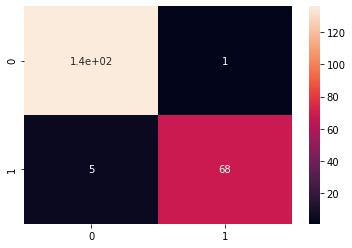

In [61]:
sns.heatmap(confusion_matrix(y_test,predicted_1),annot = True)

### Confusion Metrics for SVM

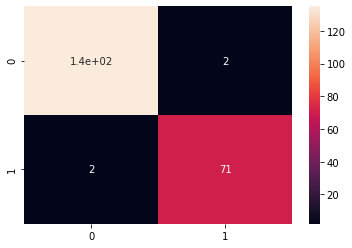

In [59]:
sns.heatmap(confusion_matrix(y_test,predicted_2),annot = True)